In [ ]:
!pip install tensorflow

Record:  Humanity's growing footprint hasn't been kind to the planet - or our own future. Can intelligent #DigitalPower reshape our relationship with #energy & lead us into a green & abundant #IntelligentWorld2030? Learn more. https://tinyurl.com/y4tf4t72 #HuaweiBlog
Label:  2021-12-23T10:29:22+0000
Epoch 1/15
1044/1044 [==============================] - 43s 39ms/step - loss: 6.1456 - accuracy: 0.2416 - val_loss: 5.1589 - val_accuracy: 0.4375
Epoch 2/15
1044/1044 [==============================] - 41s 40ms/step - loss: 4.6117 - accuracy: 0.4825 - val_loss: 4.2439 - val_accuracy: 0.5781
Epoch 3/15
1044/1044 [==============================] - 41s 39ms/step - loss: 3.9311 - accuracy: 0.5752 - val_loss: 4.0843 - val_accuracy: 0.5941
Epoch 4/15
1044/1044 [==============================] - 41s 40ms/step - loss: 3.6706 - accuracy: 0.5937 - val_loss: 4.1283 - val_accuracy: 0.6027
Epoch 5/15
1044/1044 [==============================] - 40s 38ms/step - loss: 3.5281 - accuracy: 0.5997 - val_loss:

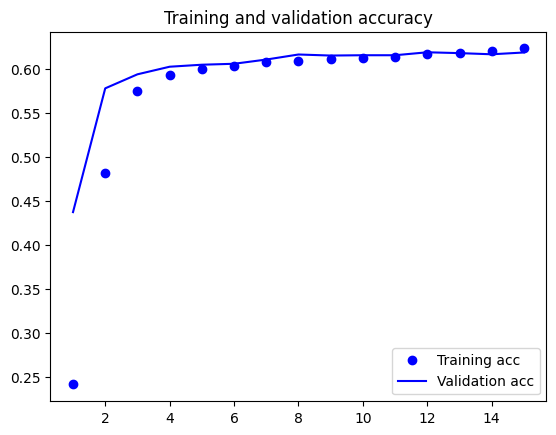

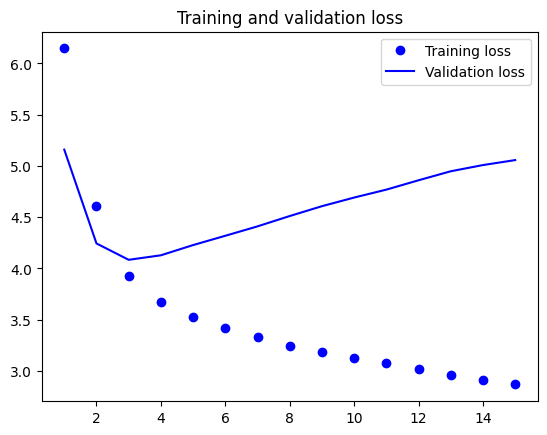

261/261 [==============================] - 3s 13ms/step - loss: 5.0569 - accuracy: 0.6189
Test loss: 5.056933403015137
Test accuracy: 0.6188593506813049


In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/Huwavie data 2021_2022.xlsx')
x = df.iloc[:, 1].values
y = df.iloc[:, 0].values

print("Record: ", x[23])
print("Label: ", y[23])

# Convert text data to word sequences
word_sequences = [str(text).split() for text in x]

# Train Word2Vec model
model_w2v = Word2Vec(sentences=word_sequences, vector_size=100, window=5, min_count=1)

# Convert word sequences to Word2Vec embeddings
X = pad_sequences([[model_w2v.wv[word] for word in sequence] for sequence in word_sequences], maxlen=20)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Convert the labels to categorical format
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
